In [0]:
!pip install arviz
!pip install pymc3==3.8

     |████████████████████████████████| 1.5MB 7.6MB/s 
     |████████████████████████████████| 4.1MB 44.5MB/s 
     |████████████████████████████████| 337kB 56.0MB/s 
     |████████████████████████████████| 911kB 9.5MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [0]:
from pymc3 import Poisson, Uniform, Categorical, Normal, MvNormal
from pymc3 import *
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Load data

In [0]:
w_true = np.array([[1,-2,2],
                  [3,1,0],])
b_true = np.array([-1,5,2]).reshape((1,3))

In [0]:
df_train = pd.read_csv('/content/synthetic-3C2D.csv',index_col=0)
df_train=df_train.reset_index()

In [0]:
df_train.columns

In [0]:
x = df_train[['feature1', 'feature2']]
y_noisy = df_train['noisy target']

#Marginalized Mixture model implementation

In [0]:
import theano.tensor as tt
import theano
k=3
m= x.shape[1]
n= x.shape[0]
# num_classes = k
# num_features = m

with Model() as marginalizedModel:
    #assume five classes
    pi = pm.Dirichlet('pi',np.array([1]*k))
    # z = Categorical(name='z',p=pi, shape=(n))


    #regression parameter
    w = Normal('w', mu=0, sd=1, shape=(m,k))
    b = Normal('b',mu=0,sd=1, shape=(1,k))
    σ  = pm.HalfCauchy('σ',0.2, shape=k)
    
    y = b+pm.math.dot(x,w)
    #sd is noise in here
    # use log of price in the actual model
    price = pm.NormalMixture('price', pi, mu=y, sigma=σ, observed=y_noisy)

In [0]:
#fit model
with marginalizedModel:
    trace = pm.sample(20000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, b, w, pi]
Sampling 2 chains, 0 divergences: 100%|██████████| 44000/44000 [03:44<00:00, 195.86draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb07c53ab38>,
      dtype=object)

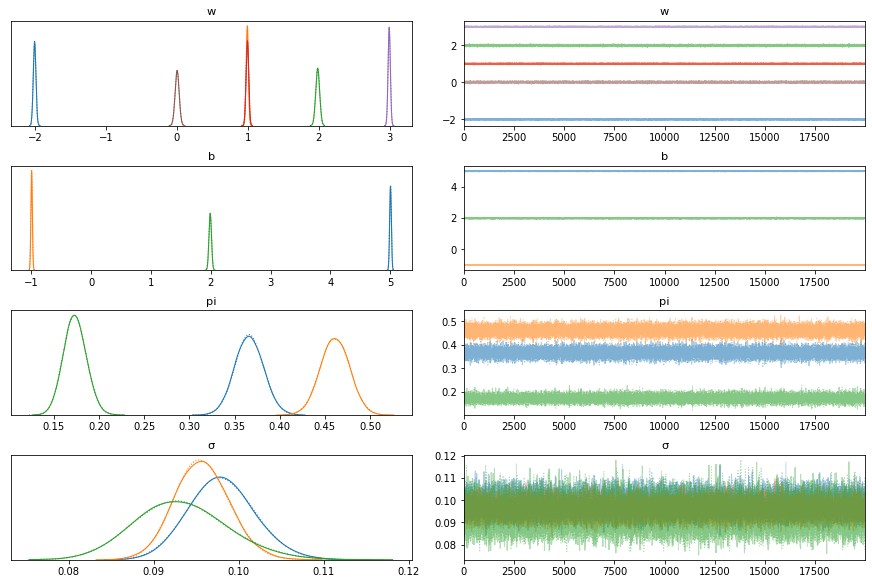

In [0]:
pm.traceplot(trace)

In [0]:
np.histogram(trace['w'])

In [0]:
np.mean(trace['b'],axis=0)

array([[ 5.00587459, -0.99716474,  1.98982211]])

In [0]:
# z_map = z_map.flatten()
w_map = trace['w'].mean(axis=0)
b_map = trace['b'].mean(axis=0)

In [0]:
w_true,b_true

(array([[ 1, -2,  2],
        [ 3,  1,  0]]), array([[-1,  5,  2]]))

In [0]:
b_map.round(decimals=1)

array([[ 5., -1.,  2.]])

In [0]:
w_map.round(decimals=1)

array([[-2.,  1.,  2.],
       [ 1.,  3.,  0.]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb05b1a2400>,
      dtype=object)

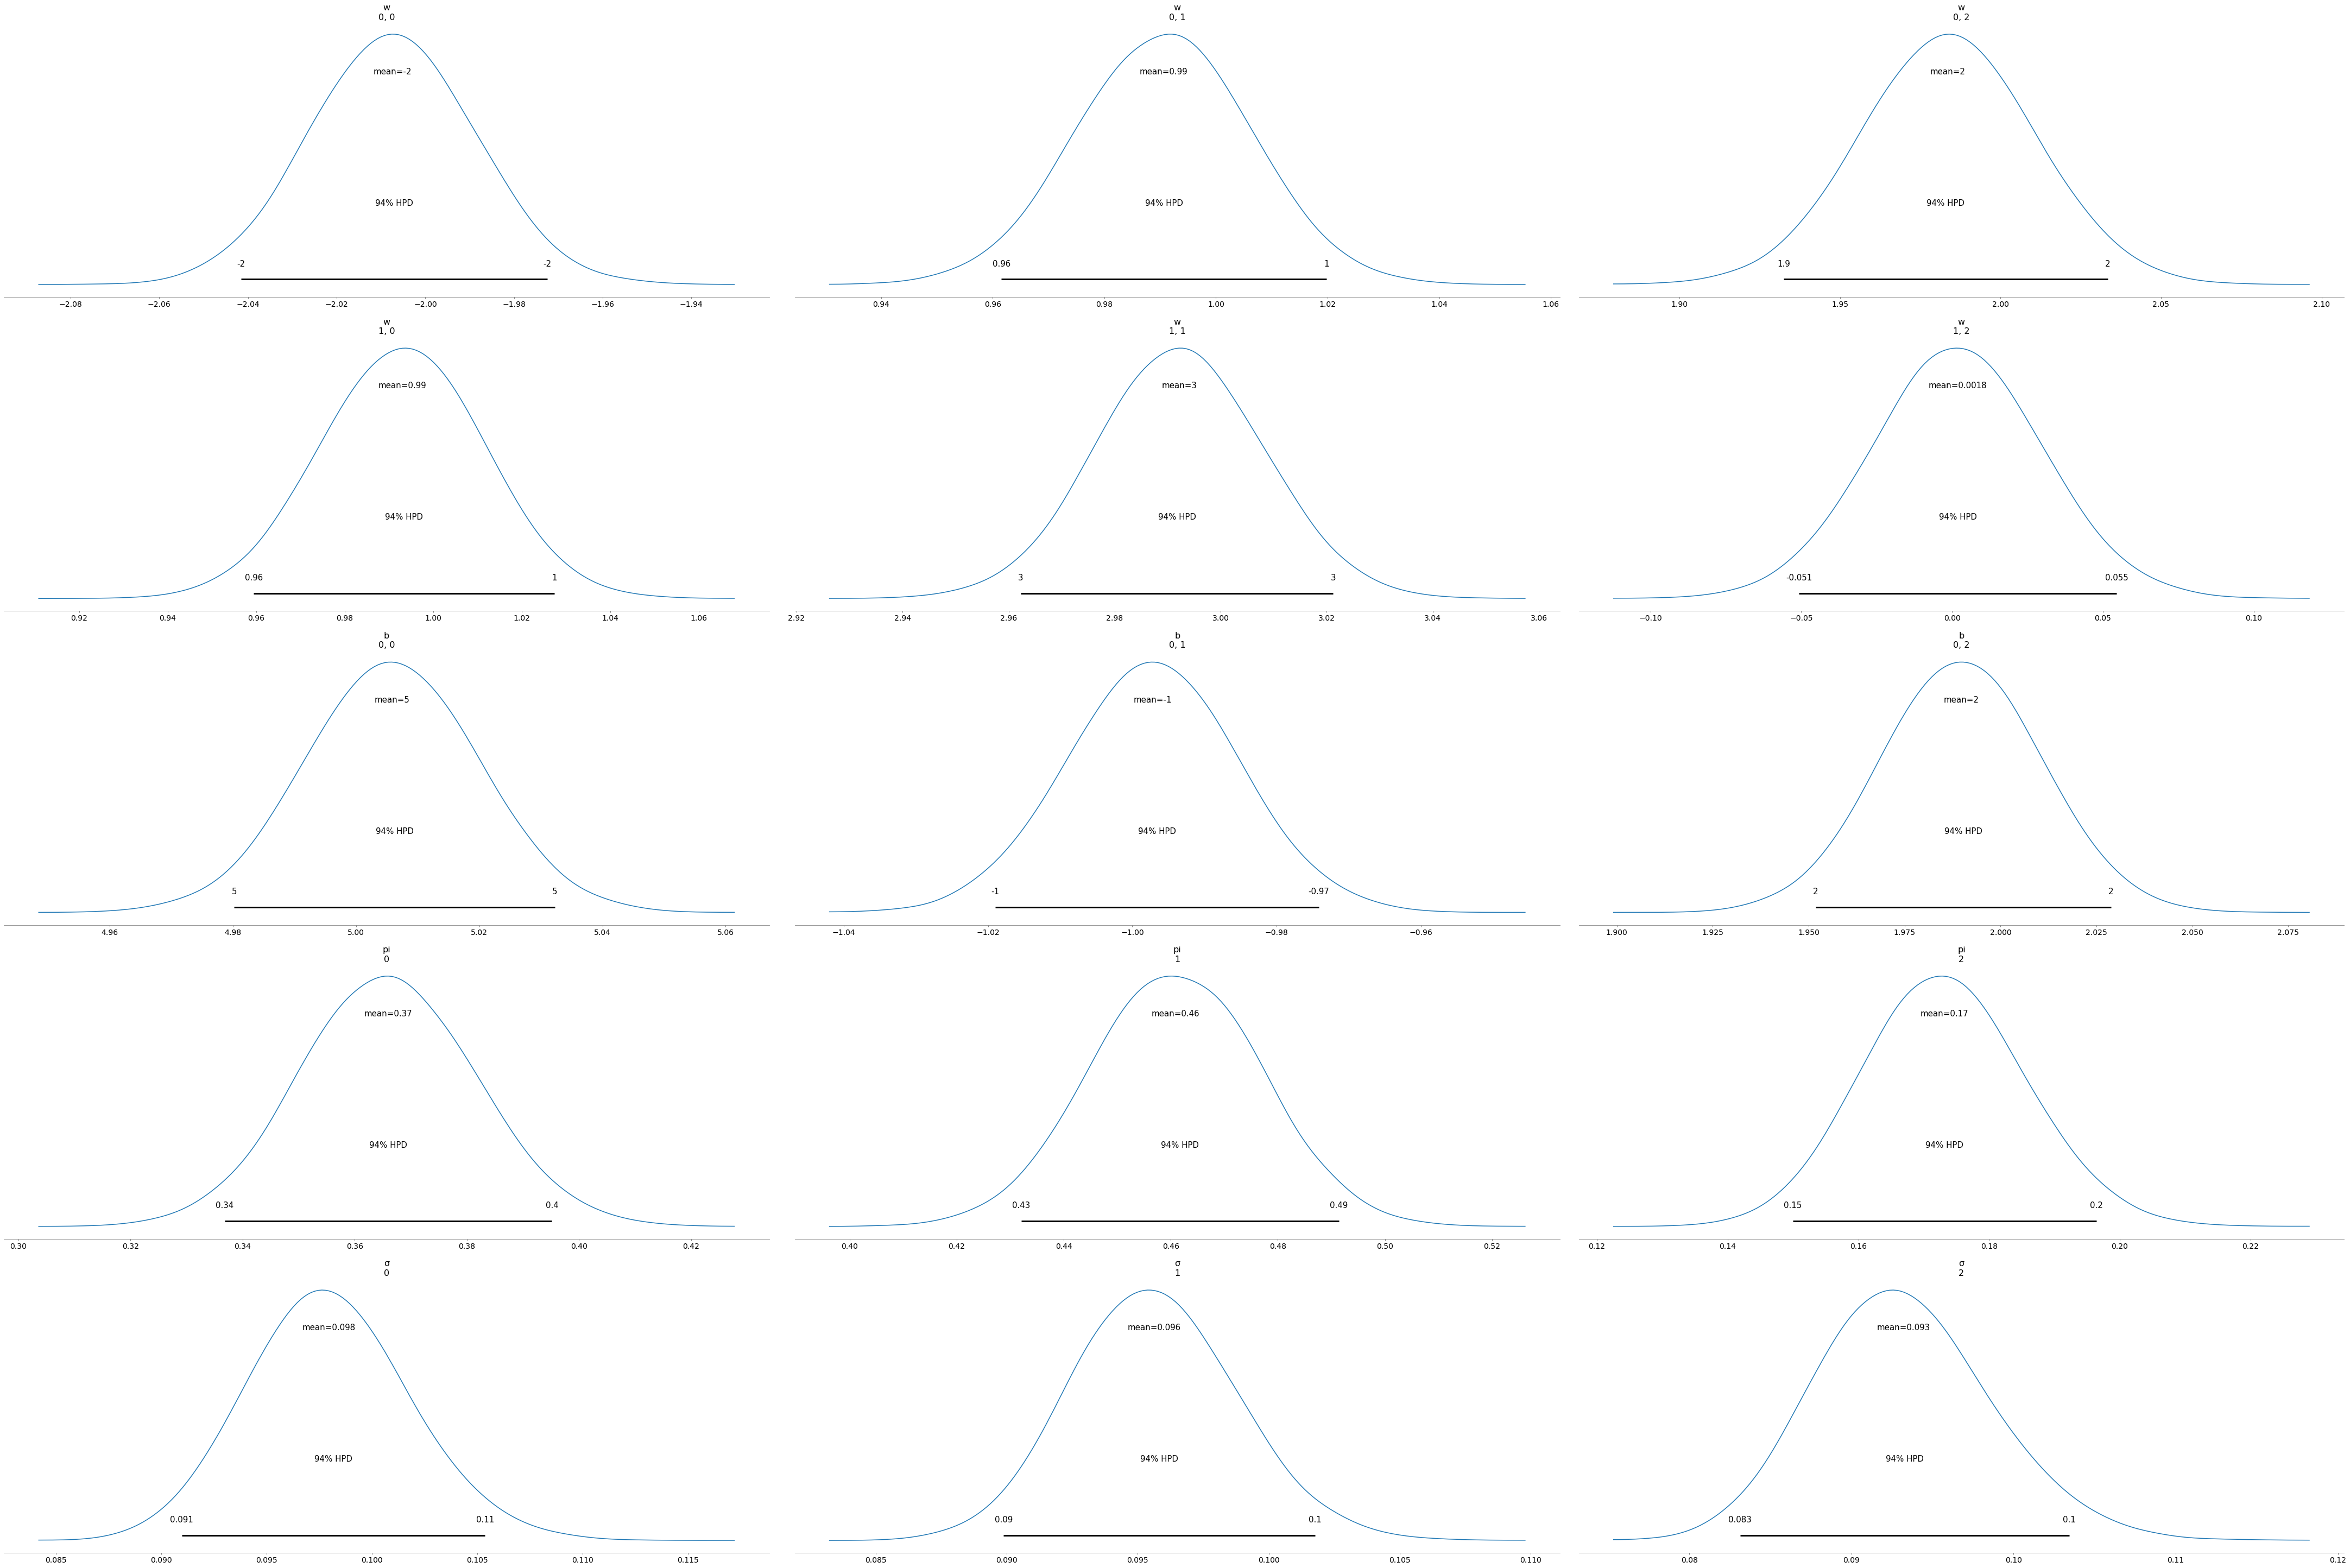

In [0]:
pm.plot_posterior(trace,point_estimate='mean',figsize=(60,40))

# how to recover z?